In [25]:
from matplotlib import pylab as plt
import pandas as pd
import numpy as np

In [9]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
header = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, names=header)
raw_df.fillna(0, inplace=True)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]


<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Felipe Passos\AppData\Local\Temp\ipykernel_6828\1512200483.py:8: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, names=header)


In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

mod = KNeighborsRegressor().fit(X, y)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])

pipe.fit(X, y)

# pred = mod.predict(X)
#
# pred

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=1))])

# Distribuição e Predição por Regressão de Vizinhos

A regressão por vizinhos considera os _n_ vizinhos de cada valor para poder prever o valor relacionado a cada combinação de fatores x, de modo que o valor predito será a média entre os valores dos vozinhos, podendo ser de 1 a 5. Caso apliquemos, como no exemplo, o valor de vizinhos considerados (distância) obteremos uma reta pois, em linhas gerais, a predição não irá distribuir os valores e considerará uma relação de 1 x 1.

## Exemplo
O exemplo em questão objetiva observar a distribuição dos valores previstos pelo modelo a partir dos mesmos valores de X passados para sua criação, de forma que, teoricamente, os valores exibidos nos gráficos serão os mesmos da tabela pai (no caso de considerarmos um unico valor _n_ para a distância).

 * StandardScaler -> Tem como objetivo normalizar os dados, padronizando-os para que tenham média 0 e desvio padrão 1, para que tenhamos maior desempenho em modelos sensíveis á escala dos dados (importante no cenário de regressão de vizinhos que trabalha, justamente com as médias entre o valores.
 * Pipeline -> define um fluxo de pré-processamento aplicado antes do treinamento do modelo, garantindo tanto a normalização quanto outras ações necessárias para preparar o modelo para o treinamento como ,no exemplo acima, o tipo de modelo que será utilizado e a normalização dos dados.

In [36]:
pred = pipe.predict(X)

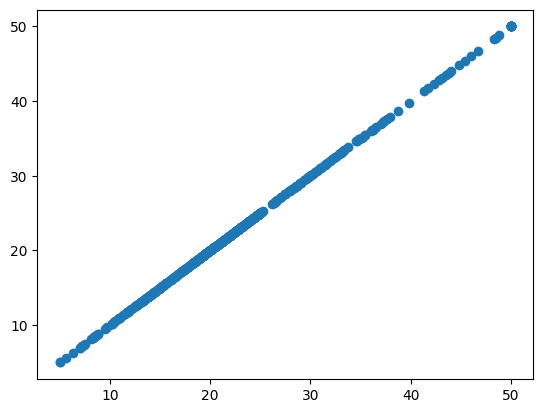

In [37]:
plt.scatter(pred, y);

In [28]:
from sklearn.linear_model import LinearRegression

mod = LinearRegression()

mod.fit(X, y)

pred = mod.predict(X)

pred

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

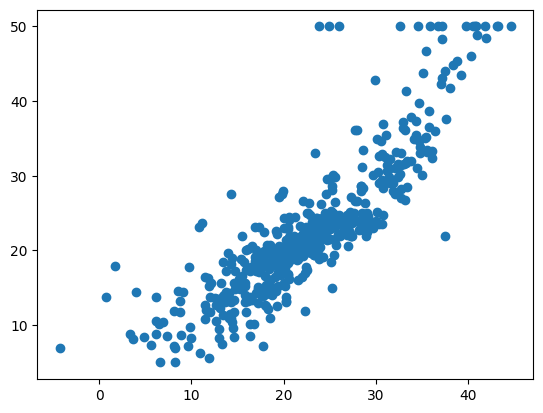

In [27]:
plt.scatter(pred, y);